# (1). Problem Statement :
# To Predict the price of flight ticket on the basis of given data.

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

- Task 1:- Prepare a complete data analysis report on the given data.

- Task 2:- Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# (2). Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# It ignore all warning messages and not display them during execution of our code.
import warnings
warnings.filterwarnings("ignore")

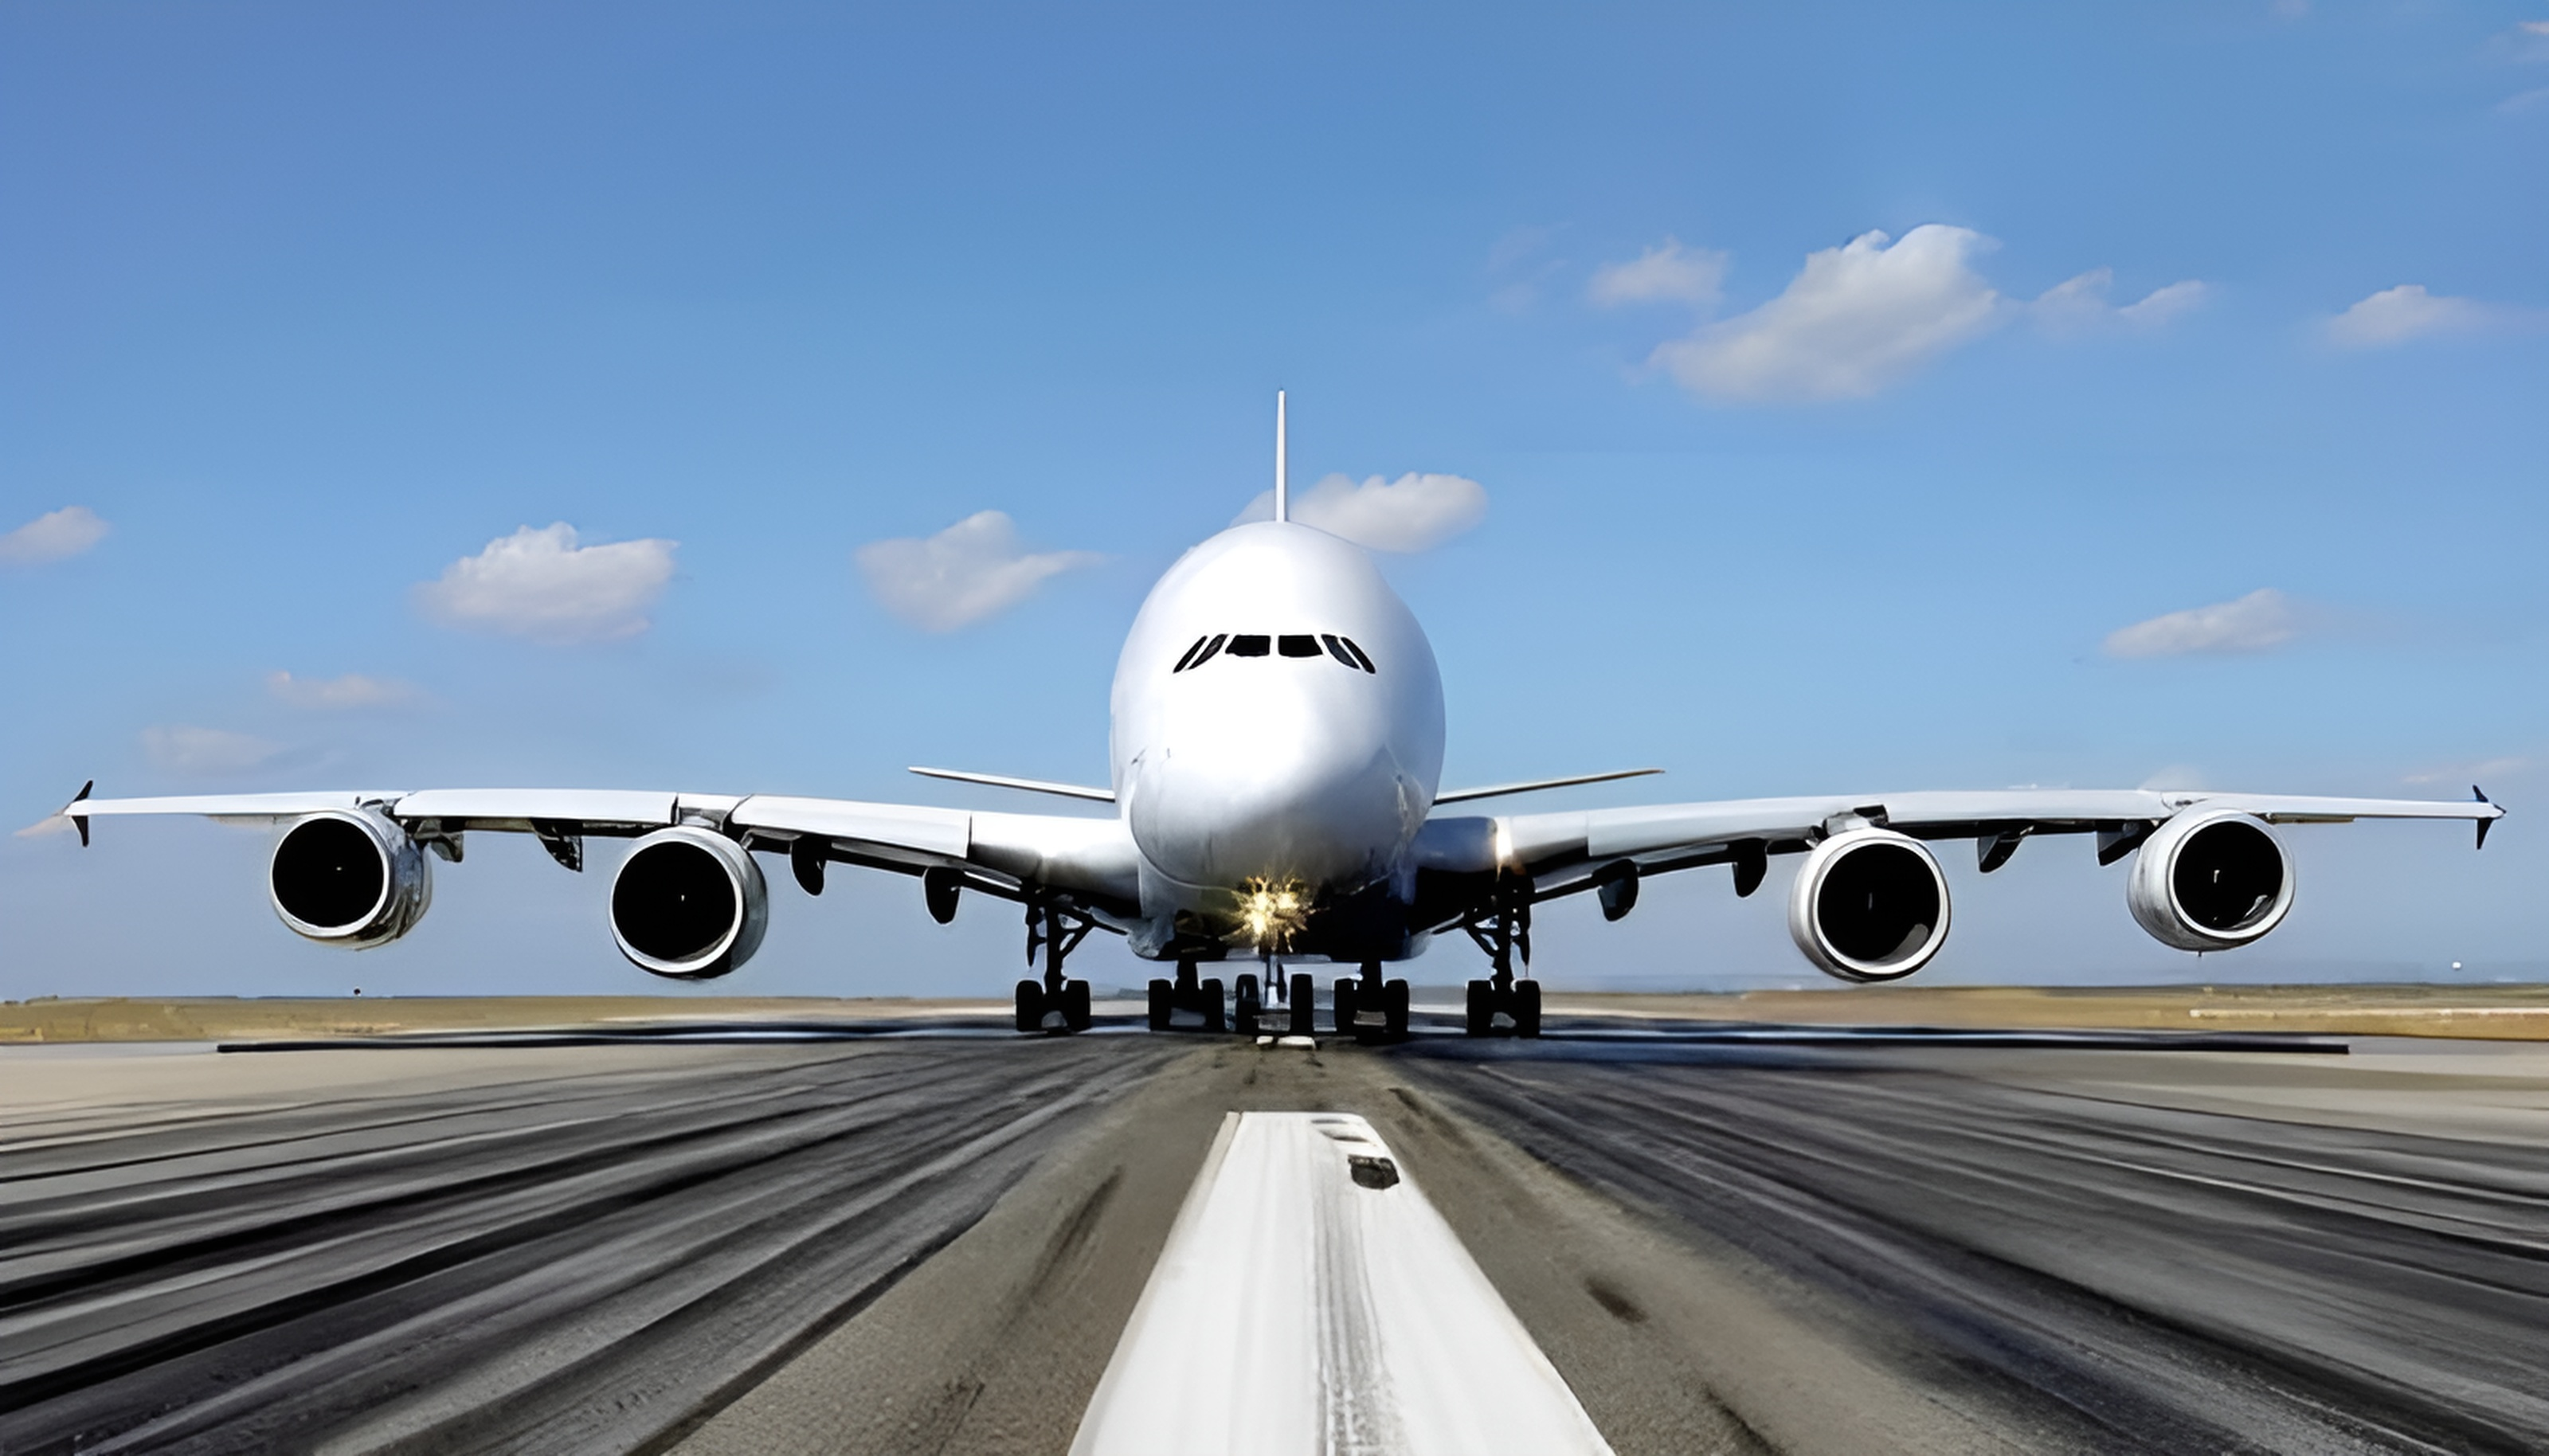

In [2]:
from IPython.display import Image

# Setting the path to our image file.
image_path = "AirplanePic.jpeg"

# Settting the desired width and height.
width = 950
height = 50

# Displaying the image with the specified size
Image(filename = image_path, width = width, height = height)

# (3). Load Dataset
- Since data is in the form of excel file, So we have used "pandas.read_excel" to load the data.

In [3]:
# Reading the Excel file and storing it into 'data' as DataFrame.
data = pd.read_excel("Flight_Fare.xlsx")

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# (4). Domain Analysis

## (4.1) Airline :

- This column will include various name of the airline company such as Indigo, Jet Airways, Air India, and many more.

## (4.2) Date_of_Journey :

- This column will show us the date on which the passenger’s journey will start.

## (4.3) Source :

- This column consists of name of the place from where the passenger’s journey will start.

## (4.4) Destination :

- This column consists of name of the place to where passengers wanted to travel.

## (4.5) Route :

- This column tells us the route passengers have chosen for their journey from the starting point to their destination.

## (4.6) Dep_time :

- This column tells us about when the flight leaves from the starting airport.

## (4.7) Arrival_time :

- Arrival time is when the passenger will reach his/her destination.

## (4.8) Duration :

- Duration is the whole period that a flight will take to complete its journey from source to destination.

## (4.9) Total_Stops :

- This will let us know in how many places flights will stop there for the flight in the whole journey.

## (4.10) Additional_Info :

- This column tells us that it has extra details or notes about the flight, like special services(food, kind of food), amenities, or instructions that aren't in the other columns.

## (4.11) Price :

- This column indicates that how much the flight ticket costs, and it's the main thing we're trying to predict in our analysis. Price of the flight for a complete journey including all the expenses before onboarding.

# (5). Basic Checks

## (5.1)  set_option
- It is used to set a 'display option' in pandas which controls the maximum number of columns to be displayed when we print a DataFrame.

In [5]:
pd.set_option('display.max_columns', None)

## (5.2) Check no. of rows and columns.

In [6]:
data.shape

(10683, 11)

## (5.3) Print first 5 rows.

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## (5.4) Print last 5 rows.

In [8]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# (5.5) Print all the columns

In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# (5.6) Print data type of each column.

In [10]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## (5.7) Check memory usage.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## (5.8) Description of all the columns.

In [12]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
# It will generate basic statistics for columns with "object(string)" data type.

data.describe(include = "object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [14]:
# It will generate basic statistics for columns with "int64" data type.

data.describe(include = "int64")

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# (6). EDA (Exploratory Data Analysis)

## (6.1) Univariate Analysis

In [15]:
# It shows us the list of all columns.

data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### (6.1.1) Countplot

#### (6.1.1.1) Countplot for Airline
- countplot is used to check whether data is balanced or not.
- data balanced :- If we have equal number of records then we call it as balanced data.

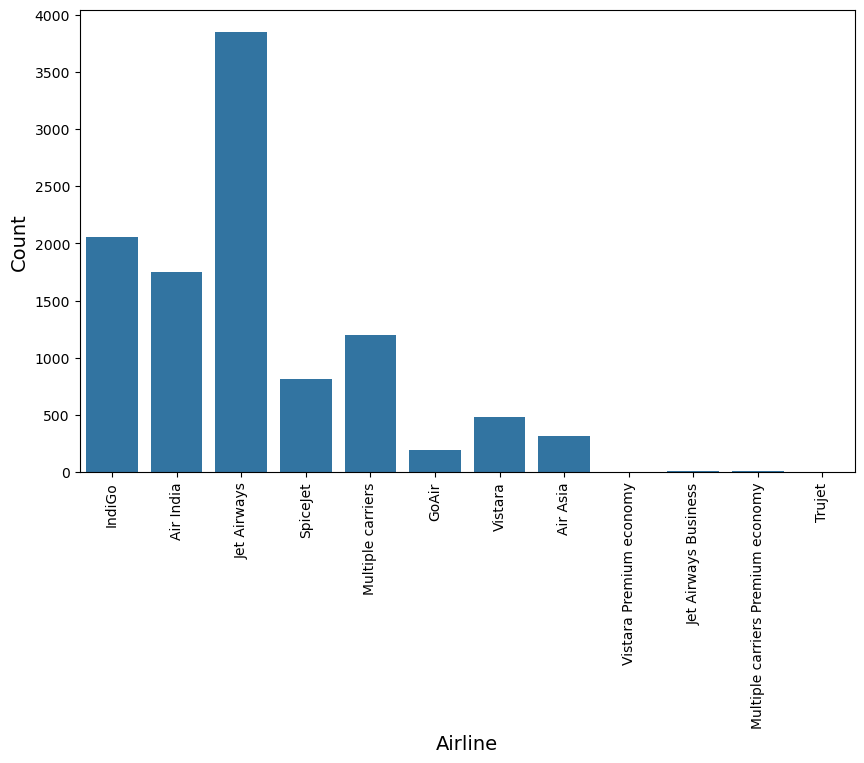

In [16]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating a count plot for the 'Airline' column from the 'data' DataFrame.
sns.countplot(x='Airline', data = data)

# Adding labels to the x and y axes.
plt.xlabel("Airline", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

# We are making the x-axis labels easier to read by turning them sideways.
plt.xticks(rotation = 90, fontsize = 10)

# Displaying the plot.
plt.show()

#### Insights from count plot of 'Airline' :
- When we are comparing the cost of various flights, Jet Airways is most expensive among them.
- Jet Airways has the biggest percentage in the market, and Indigo is the Airline with the second-largest share after Jet Airways.

#### (6.1.1.2) Countplot for Source

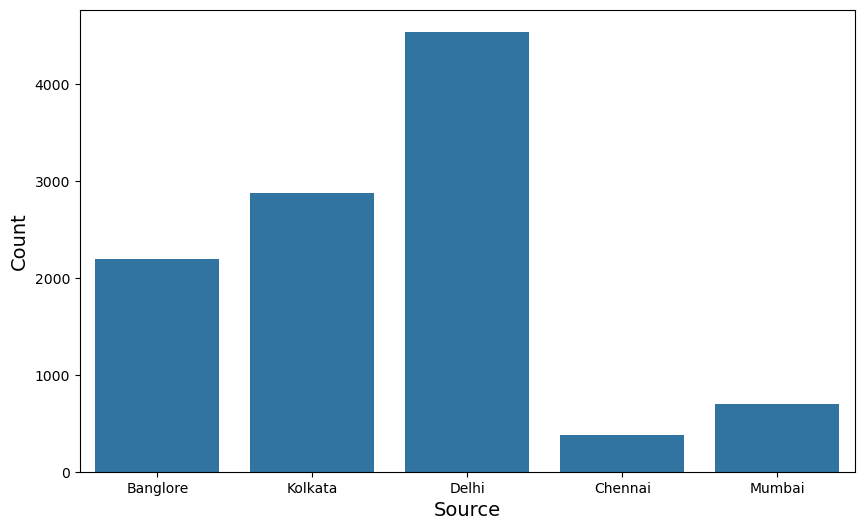

In [17]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating a count plot for the 'Source' column from the 'data' DataFrame.
sns.countplot(x='Source', data=data)

# Adding labels to x and y axes.
plt.xlabel("Source", fontsize=14)
plt.ylabel("Count", fontsize=14)

# We are setting the font size of x-axis labels.
plt.xticks(fontsize=10)

# Displaying the plot.
plt.show()

#### Insights from count plot of 'Source'.
- Delhi has the highest number of flights starting from there, followed by Kolkata and Bangalore.

#### (6.1.1.3) Countplot for Destination

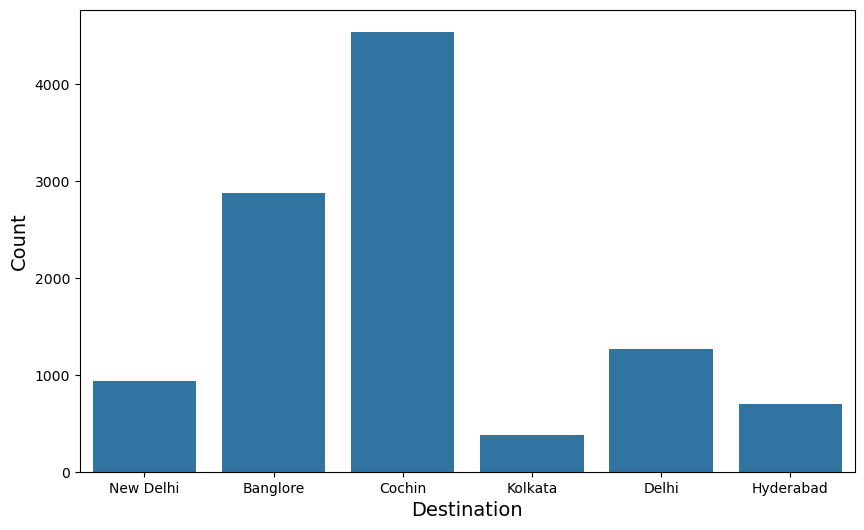

In [18]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating a count plot for the 'Destination' column from 'data' DataFrame.
sns.countplot(x='Destination', data=data)

# Adding labels to the x and y axes.
plt.xlabel("Destination", fontsize=14)
plt.ylabel("Count", fontsize=14)

# We are setting the font size of x-axis labels.
plt.xticks(fontsize=10)

# Displaying the plot.
plt.show()

#### Insights for count plot of 'Destination'.
- Cochin has the highest landing of the flights from different places followed by Bangalore.

#### (6.1.1.4) Countplot for Total_Stops

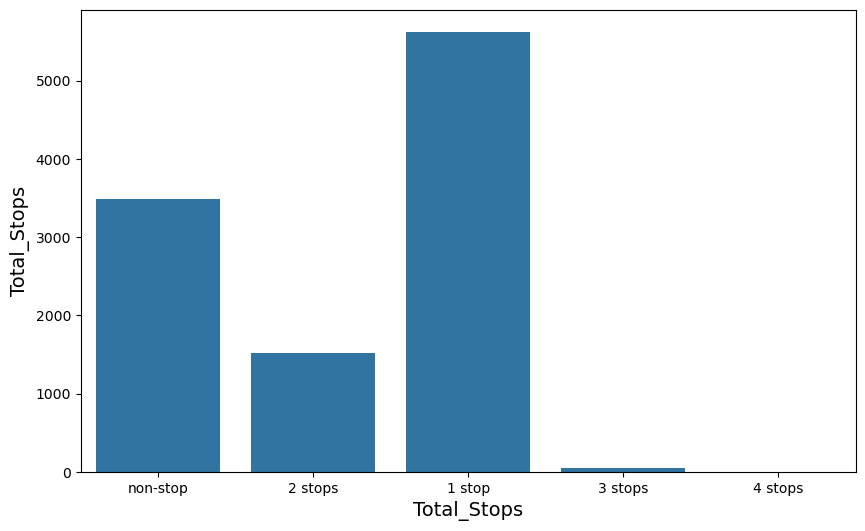

In [19]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the count plot for 'Total_Stops' from the 'data' DataFrame.
sns.countplot(x='Total_Stops', data=data)

# Adding the lables to x and y axes.
plt.xlabel("Total_Stops", fontsize=14)
plt.ylabel("Total_Stops", fontsize=14)

# We are setting the font size of the x-axis labels.
plt.xticks(fontsize=10)

# Displying the plot.
plt.show()

#### Insights from count plot of  'Total_Stops'.
- Many flights either have one stop or go directly to the destination without stopping. 

#### (6.1.1.5) Countplot for Additional_Info

In [20]:
data['Additional_Info'].unique()
data['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

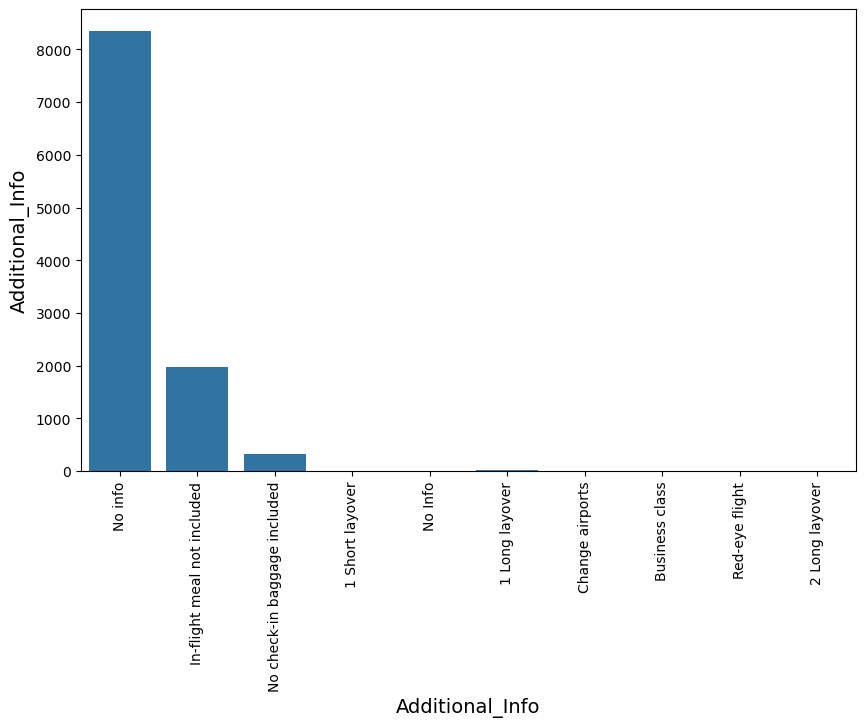

In [21]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the count plot for the 'Additional_Info' column from the 'data' DataFrame.
sns.countplot(x='Additional_Info', data=data)

# Adding labels to the x and y axes.
plt.xlabel("Additional_Info", fontsize=14)
plt.ylabel("Additional_Info", fontsize=14)

# We are making the x-axis labels easier to read by turning them sideways.
plt.xticks(rotation=90, fontsize=10)

# Displaying the plot.
plt.show()

#### Insights from count plot of "Additional_Info".
- Most of the flight do not consists of any extra information.
- There are few flights with extra information such as "in-flight meal not included".

### (6.1.2) Using sweetviz

In [22]:
!pip install sweetviz

In [23]:
# It imports the Sweetviz library and assigns it the alias 'sv'.
import sweetviz as sv

# It uses Sweetviz to analyze the 'data' DataFrame and generates a report,
# which is stored in the variable 'my_report'.
my_report = sv.analyze(data)

# It saves the analysis report in an HTML file named "my_report.html" and then displays it.
my_report.show_html("my_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights from sweetviz analysis :
- Most prices are within the 20,000 range, but there are few prices that are higher or lower else we can say it as exception(outliers).
- Jet Airways is the most popular airline. But if we choose Jet Airways Business, it's usually more expensive than other airlines.
- More flights take off from Delhi, and the ticket prices there are usually the highest on average.
- Cochin is the busiest destination in terms of flights. When it comes to average ticket prices, New Delhi has the record for being the highest.
- More than half of the flights require one stop during the journey, while around one-third of the flights are direct.

## (6.2) Bivariate Analysis

### (6.2.1) Using Violin Plot for "Airline vs Price"

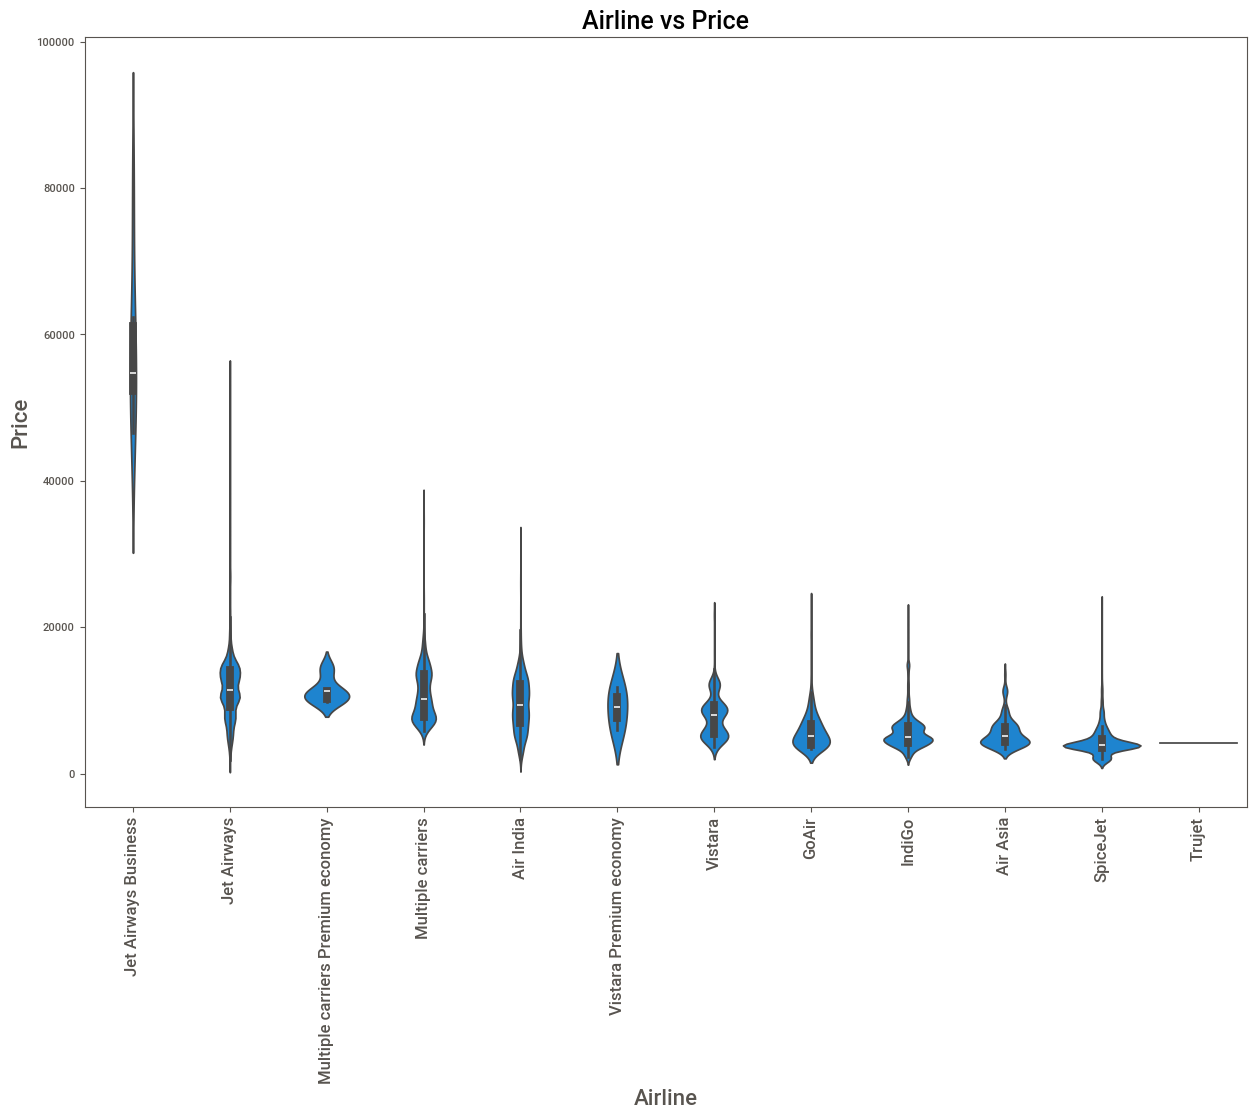

In [24]:
# Here, We are setting the figure size.
plt.figure(figsize=(15,10))

# Creating a violin plot for the 'Airline' and 'Price' from the 'data' DatFrame.
sns.violinplot(x='Airline',y='Price', data = data, order = data.groupby("Airline")["Price"].mean().sort_values(ascending = False).index)

# Adding a 'title' to the plot.
plt.title("Airline vs Price", fontsize=18)

# Adding labels to the x and y axes.
plt.xlabel("Airline", fontsize=16)
plt.ylabel("Price", fontsize=16)

# We are making the x-axis labels easier to read by turning them sideways. 
plt.xticks(rotation=90, fontsize=12)

# Displaying the plot.
plt.show()

#### Insights from violin plot of "Airline vs Price".
- Jet Airways has the highest price, when compared with the other airlines.

### (6.2.2) Line plot for "Source vs Price" 

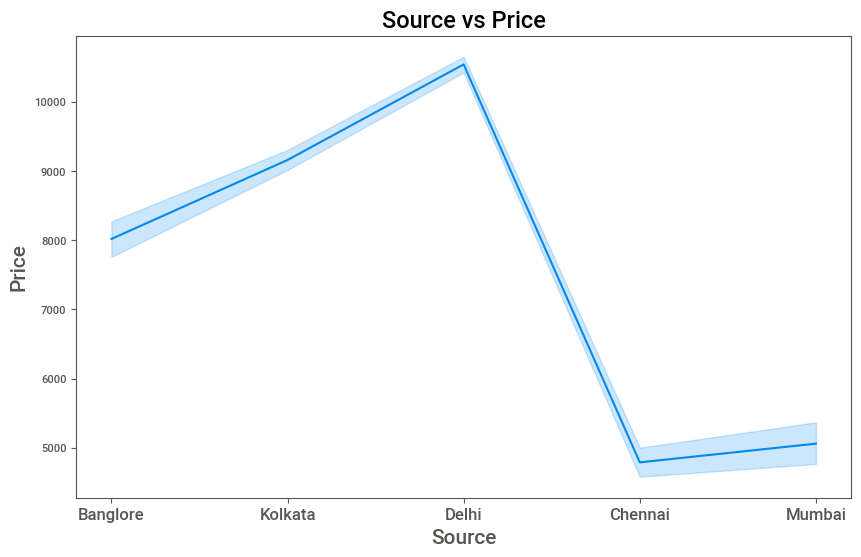

In [25]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the line plot for 'Source' and 'Price' from the 'data' DataFrame.
sns.lineplot(x="Source", y="Price", data = data)

# Adding title to the plot.
plt.title("Source vs Price", fontsize=17)

# Adding labels to the x and y axes.
plt.xlabel("Source", fontsize=15)
plt.ylabel("Price", fontsize=15)

# We are setting the font size to the x_labels.
plt.xticks(fontsize=12)

# Displaying the plot.
plt.show()

#### Insights from line plot of "Source vs Price".
- Delhi has the highest number of flights starting from there, followed by Kolkata and Bangalore.
- More flights take off from Delhi, and the ticket prices there are usually the highest on average.

### (6.2.3) Barplot for "Destination vs Price"

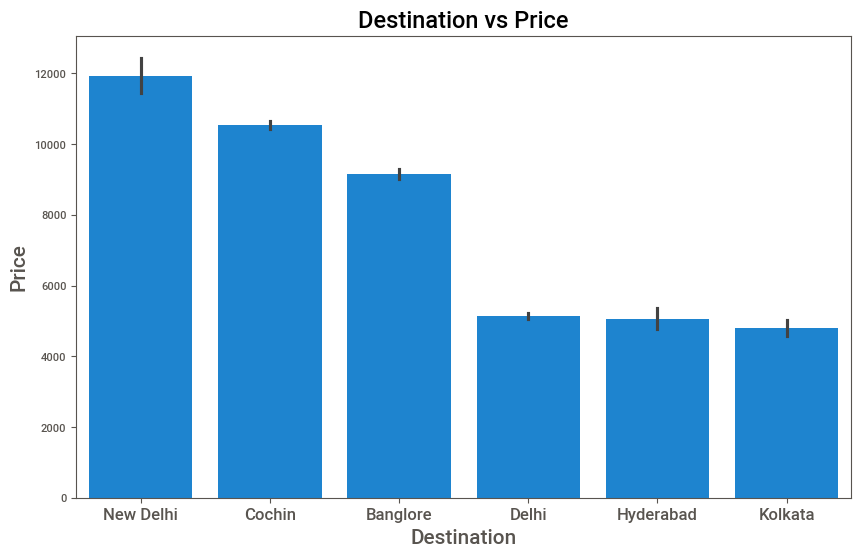

In [26]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the bar plot for the 'Destination' and 'Price' from the 'data' DataFrame.
sns.barplot(x="Destination", y="Price", data=data, order = data.groupby("Destination")["Price"].mean().sort_values(ascending = False).index)

# Adding the title to the plot.
plt.title("Destination vs Price", fontsize=17)

# Adding labels to the x and y axes.
plt.xlabel("Destination", fontsize=15)
plt.ylabel("Price", fontsize=15)

# We are setting the font size to the x_labels.
plt.xticks(fontsize=12)

# Displying the plot.
plt.show()

#### Insights from bar plot of "Destination vs Price".
- When it comes to average ticket prices, New Delhi has the record for being the highest.

### (6.2.4) Barplot for "Total_Stops vs Price"

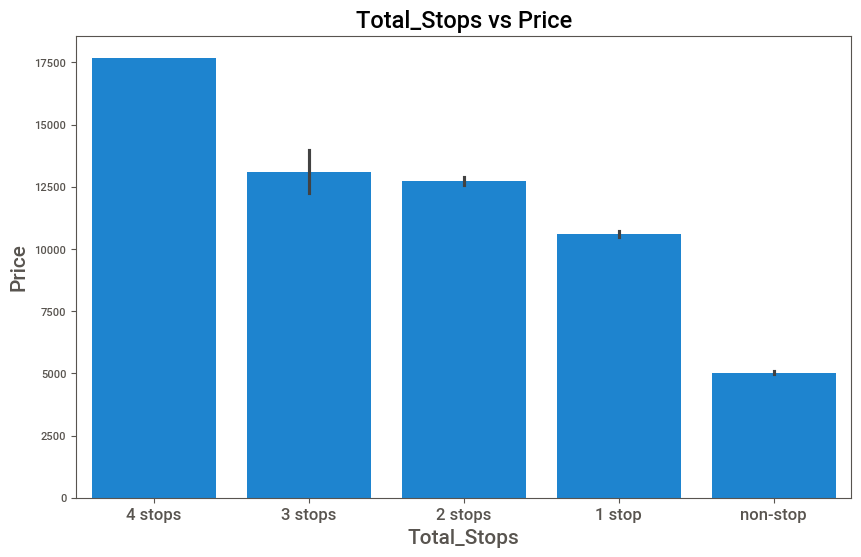

In [27]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the bar plot for the 'Total_Stops' and 'Price' from the DataFrame.
sns.barplot(x="Total_Stops", y="Price", data = data, order = data.groupby("Total_Stops")["Price"].mean().sort_values(ascending = False).index)

# Adding title to the plot. 
plt.title("Total_Stops vs Price", fontsize=17)

# Adding labels to the x and y axes.
plt.xlabel("Total_Stops", fontsize=15)
plt.ylabel("Price", fontsize=15)

# We are setting font size for the x_label.
plt.xticks(fontsize=12)

# Displaying the plot.
plt.show()

#### Insights from the bar plot of "Total_Stops vs Price".
- The flight with '4 stops' has highest flight fare, followed by 3 stop and 2 stop.

### (6.2.5) Barplot for "Additional_Info vs Price"

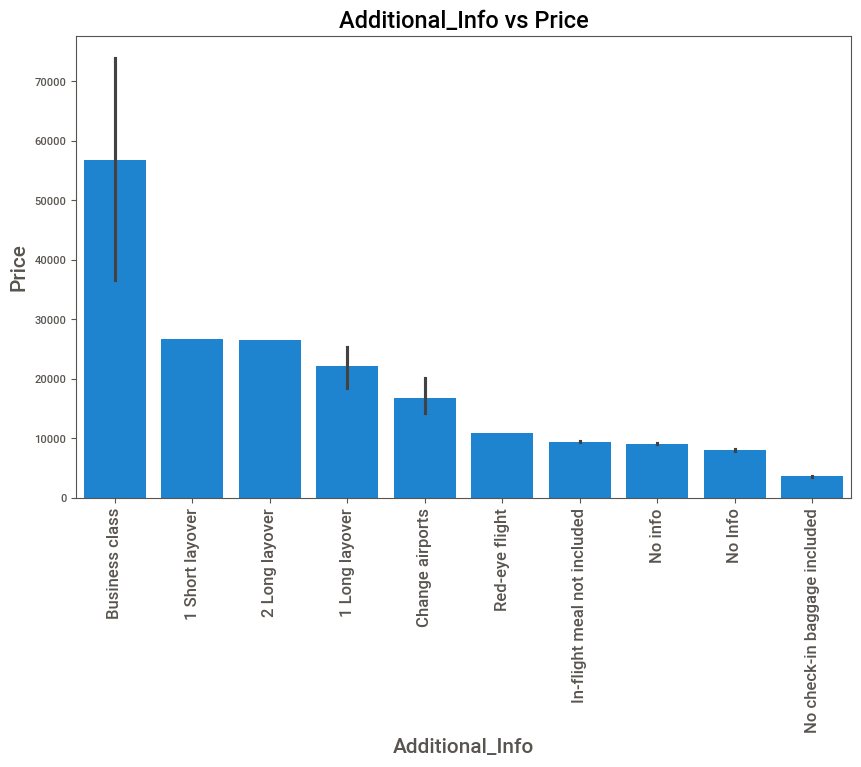

In [28]:
# Here, We are setting the figure size.
plt.figure(figsize=(10,6))

# Creating the bar plot for the 'Additional_Info' and 'Price' column from the 'data' DataFrame.
sns.barplot(x="Additional_Info", y="Price", data=data, order = data.groupby("Additional_Info")["Price"].mean().sort_values(ascending = False).index)

# Adding title to the plot.
plt.title("Additional_Info vs Price", fontsize=17)

# Adding labels to the x and y axes.
plt.xlabel("Additional_Info", fontsize=15)
plt.ylabel("Price", fontsize=15)

# We are making the x-axis labels easier to read by turning them sideways.
plt.xticks(rotation=90, fontsize=12)

# Displaying the plot.
plt.show()

#### Insights from the bar plot of 'Additional_Info vs Price'.

- The price of business class flight is higher than others.

# (7). Data Preprocessing
>- It involves cleaning up, organizing, and getting data ready for a machine learning model.

## (7.1) Check for missing values(null values) and handle them

In [29]:
# Here, We are checking the number of missing values in the 'data' DataFrame.

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Insights :
- There are two null values in our dataset.
- 1 is in 'Route' and Other in 'Total_Stops'.
- So, We are dropping both of the null values.

### (7.1.1) Removing null values

- '.dropna' is a method of Dataframe which is used to remove rows with missing values.

In [30]:
data.dropna(inplace = True)

In [31]:
# Here, We are checking total no. of rows and columns in 'data' DataFrame after removing null values.

data.shape

(10682, 11)

### (7.1.2) Checking the data after removing null values.

In [32]:
# Here, We are checking the number of missing values in the 'data' DataFrame afer removing null values.
# We found that there are no missing or null values.

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## (7.2) Checking Duplicates Values
- Duplicates are repititive(which is repeated multiple times) records.
- If data has duplicate values, then we will drop them.

In [33]:
data.duplicated().sum()

220

### (7.2.1) Removing Duplicate Values
- 'drop_duplicates' is a method of pandas DataFrame which is used to remove duplicate rows from the data DataFrame.

In [34]:
data.drop_duplicates(inplace = True)

### (7.2.2) Checking the values after removing the duplicates

In [35]:
data.duplicated().sum()

0

In [36]:
# We are checking no. of rows and columns after removing duplicates.

data.shape

(10462, 11)

### Insights :
- We can observe that before no. of rows were 10682 and now it is reduced to 10462.
- It means 220(10682-10462=220) duplicates has been removed.

## (7.3) Extracting date and month from "Date_of_Journey" column.

- From description we can see that "Date_of_Journey" is a object data type. 
- Therefore, we have to convert this datatype into timestamp. After which We will be able to use this column properly for prediction.
- For this we require "pandas.to_datetime" to convert data type into "datetime" datatype.

### (7.3.1) Date

- Here, ".dt.day" method will extract(take) day from that date.

In [37]:
data["Journey_day"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [38]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


### (7.3.2) Month

- Here, ".dt.month" method will extract(take) only month from that date.

In [39]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [40]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### (7.3.3) Dropping "Date_of_Journey" column
- Since we have converted "Date_of_Journey" column into integers, Now we will drop this column as it is of no use.

In [41]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

## (7.4) Extracting Hour and Minute from "Arrival_Time" column.

- The arrival time is when the plane reaches the gate. 
- Now we can extract values from "Arrival_Time".

In [42]:
data['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10462, dtype: object

### (7.4.1) Extracting Hours
- '.dt.hour' method will extract only hour from the 'Arrival_Time'column.

In [43]:
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour

### (7.4.2) Extracting Minutes
- '.dt.minute' method will extract minute from the 'Arrival_Time' column.

In [44]:
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [45]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


### (7.4.3) Dropping "Arrival_Time" column
- Now we will drop "Arrival_Time" column as it is of no use.

In [46]:
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [47]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


## (7.5) Extracting Hour and Minute from "Dep_Time" column.
- Departure time is when a plane takes off from the gate.

### (7.5.1) Extracting Hours
- '.dt.hour' method will extract only hour from the 'Dep_time' column.

In [48]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

In [49]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35,16


### (7.5.2) Extracting Minutes
- '.dt.minute' method will extract only minute from the 'Arrival_Time' column.

In [50]:
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [51]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


### (7.5.3) Dropping "Dep_Time" column
- Now We will drop "Dep_Time" as it is of no use.

In [52]:
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [53]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


## (7.6) Extracting Hour and Minute from "Duration" column.
- Time taken by a plane to reach its destination is known as "Duration".
- It is the difference between "Dep_Time" and "Arrival_Time".
- First of all, We will Convert "Duration" column to pandas "Timedelta" and then we will extract DurationHours and DurationMinutes from that.

In [54]:
data['Duration'] = pd.to_timedelta(data['Duration'])

### (7.6.1) Extracting DurationHours
- It extracts the hour component from the Duration column of our Pandas DataFrame and assigns it to a new column named DurationHours.

In [55]:
data['DurationHours'] = data['Duration'].dt.components['hours']

In [56]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2 stops,No info,13882,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1 stop,No info,6218,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1 stop,No info,13302,1,3,21,35,16,50,4


### (7.6.2) Extracting DurationMinutes
- It extracts the minute components from the Duration column of our pandas DataFrame and assigns it to a new column named durationMinutes.

In [57]:
data['DurationMinutes'] = data['Duration'].dt.components['minutes']

### (7.6.3) Dropping "Duration" column
- Now we will drop 'Duration' column as it is of no use.

In [58]:
data.drop(["Duration"], axis=1, inplace=True)

In [59]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


## (7.7) Dropping  Additional_Info  and Route column

### (7.7.1) Dropping "Additionl_Info" column

In [60]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [61]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [62]:
data.drop(["Additional_Info"], axis=1, inplace=True)

In [63]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,21,35,16,50,4,45


#### Insights :
- Almost 80% of the the data has no information in 'Additional_Info' column. So, We are dropping it.

### (7.7.2) Dropping "Route" column

In [64]:
data["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [65]:
data.drop(["Route"], axis=1, inplace=True)

In [66]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45


#### Insights :
- "Route" and "Total_Stops" columns are related to each other. 
- So, We are dropping one of them i.e, We are dropping "Route" column.

## (7.8) Converting Categorical data into numerical data

In [67]:
# It will print data types of each column.

data.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Price               int64
Journey_day         int32
Journey_month       int32
Arrival_hour        int32
Arrival_min         int32
Dep_hour            int32
Dep_min             int32
DurationHours       int64
DurationMinutes     int64
dtype: object

In [68]:
# It will create a copy of the 'data' object and assign it to a new variable named 'data2'.

data2 = data.copy()

In [69]:
# It will print all the columns of 'data2'.

print(data2.columns)

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_min',
       'Dep_hour', 'Dep_min', 'DurationHours', 'DurationMinutes'],
      dtype='object')


In [70]:
# We have defined the list of columns on which we want to perform one-hot encoder.

columns_to_encode = ["Airline","Source","Destination","Total_Stops"]

# We will iterate through each column to perform one-hot encoding.

for column in columns_to_encode:
    
    # We have created one-hot encoded DataFrame for the current column.
    
    one_hot_encoded = pd.get_dummies(data2[column], prefix=column, drop_first=True)
    
    # Here, We are converting True and False values to 1 and 0.
    
    one_hot_encoded = one_hot_encoded.astype(int)
    
    # Now, We will concatenate the one-hot encoded DataFrame with the original data2 DataFrame.
    
    data2 = pd.concat([data2, one_hot_encoded], axis=1)
    
    # Here, We are dropping the original categorical column from data2.
    
    data2.drop(column, axis=1, inplace=True)

# Finally At the end of the loop, all specified columns are one-hot encoded and the original columns are dropped.

In [71]:
# It will show first 5 rows from the dataset.

data2.head()

,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,7662,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,13882,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,6218,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,13302,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


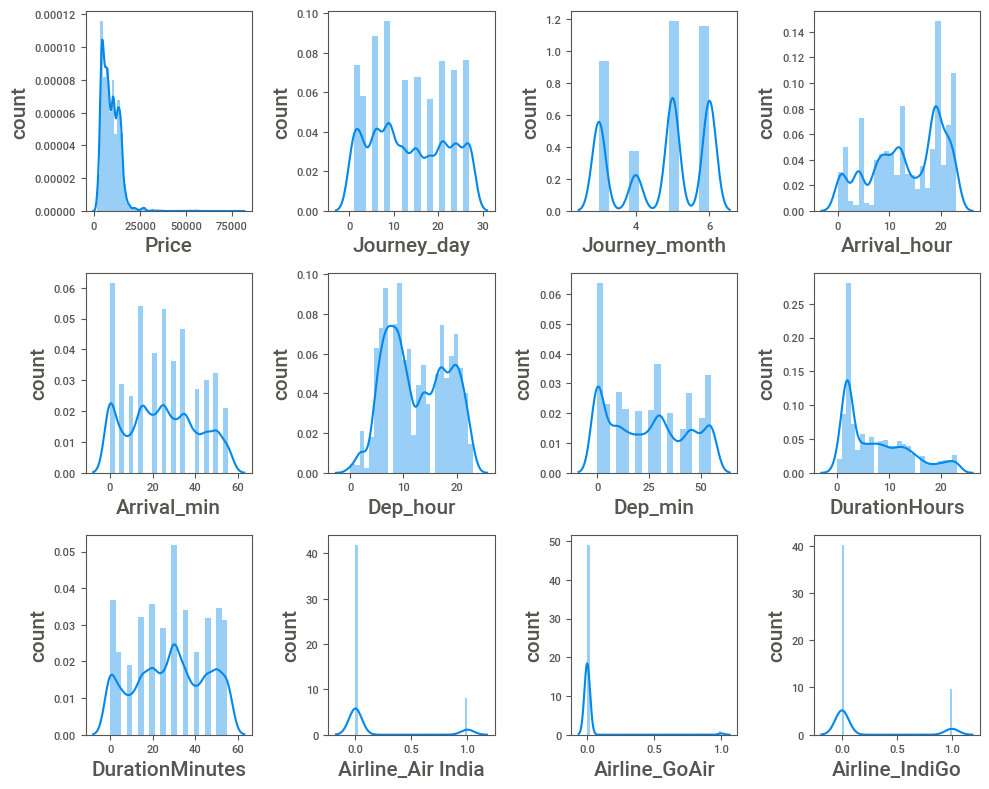

In [72]:
# It will create a new figure with a fixed size and background color.
plt.figure(figsize = (10, 8), facecolor='white')

# Initializing a counter for subplot placement.
plotnumber = 1

# Looping through each histopathological features in the data.
for column in data2:

    # Limiting the number of subplots to 12.
    if plotnumber <= 12:

        # creating a subplot in an 3*4 grid.
        plt.subplot(3, 4, plotnumber)

        # Plotting a histogram with KDE for the current histopathological feature.
        sns.distplot(x=data2[column])

        # Setting labels for the x and y axes.
        plt.xlabel(column, fontsize=15)  # Use 'column' instead of 'data2'
        plt.ylabel('count', fontsize=15)

    # Incrementing the plot number for the next iteration or
    # Move to the next subplot.
    plotnumber = plotnumber + 1

# Adjust the layout for better spacing.
plt.tight_layout()

# It will display the plot.
plt.show()

## (7.9) Scaling(MinMaxScaler or StandardScaler)
- Sacling is always applied on continuous columns.

In [73]:
# '.drop' is a method of pandas DatFrame which is used to remove specific column.

x = data2.drop("Price", axis=1)
x.head()

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
# Importing the MinMaxScaler class from the scikit-learn library.
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the MinMaxScaler.
scaler = MinMaxScaler()

# Assuming 'x' is the data we want to scale, 
# then fitting and transforming the data using the scale.
x = scaler.fit_transform(x)
print(x)

[[0.88461538 0.         0.04347826 ... 0.         0.         1.        ]
 [0.         0.66666667 0.56521739 ... 0.         0.         0.        ]
 [0.30769231 1.         0.17391304 ... 0.         0.         0.        ]
 ...
 [1.         0.33333333 0.47826087 ... 0.         0.         1.        ]
 [0.         0.         0.60869565 ... 0.         0.         1.        ]
 [0.30769231 0.66666667 0.82608696 ... 0.         0.         0.        ]]


# (8). Feature Engineering

## (8.1) Finding correlation among data

- If it's a Regression, We check correlation between input and output variables.
- If it's a Classification, We check correlation among the input variables.

In [75]:
# Selecting rows from 0 to 9(excluding) and columns from 0 to 9(excluding).
df = data2.iloc[0:9,0:9]

# Now, 'df' contains a subset of the original DataFrame 'Data2' which includes first 9 rows and 9 columns.
df

,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes
0,3897,24,3,1,10,22,20,2,50
1,7662,1,5,13,15,5,50,7,25
2,13882,9,6,4,25,9,25,19,0
3,6218,12,5,23,30,18,5,5,25
4,13302,1,3,21,35,16,50,4,45
5,3873,24,6,11,25,9,0,2,25
6,11087,12,3,10,25,18,55,15,30
7,22270,1,3,5,5,8,0,21,5
8,11087,12,3,10,25,8,55,1,30


## (8.2) Plotting Heatmap

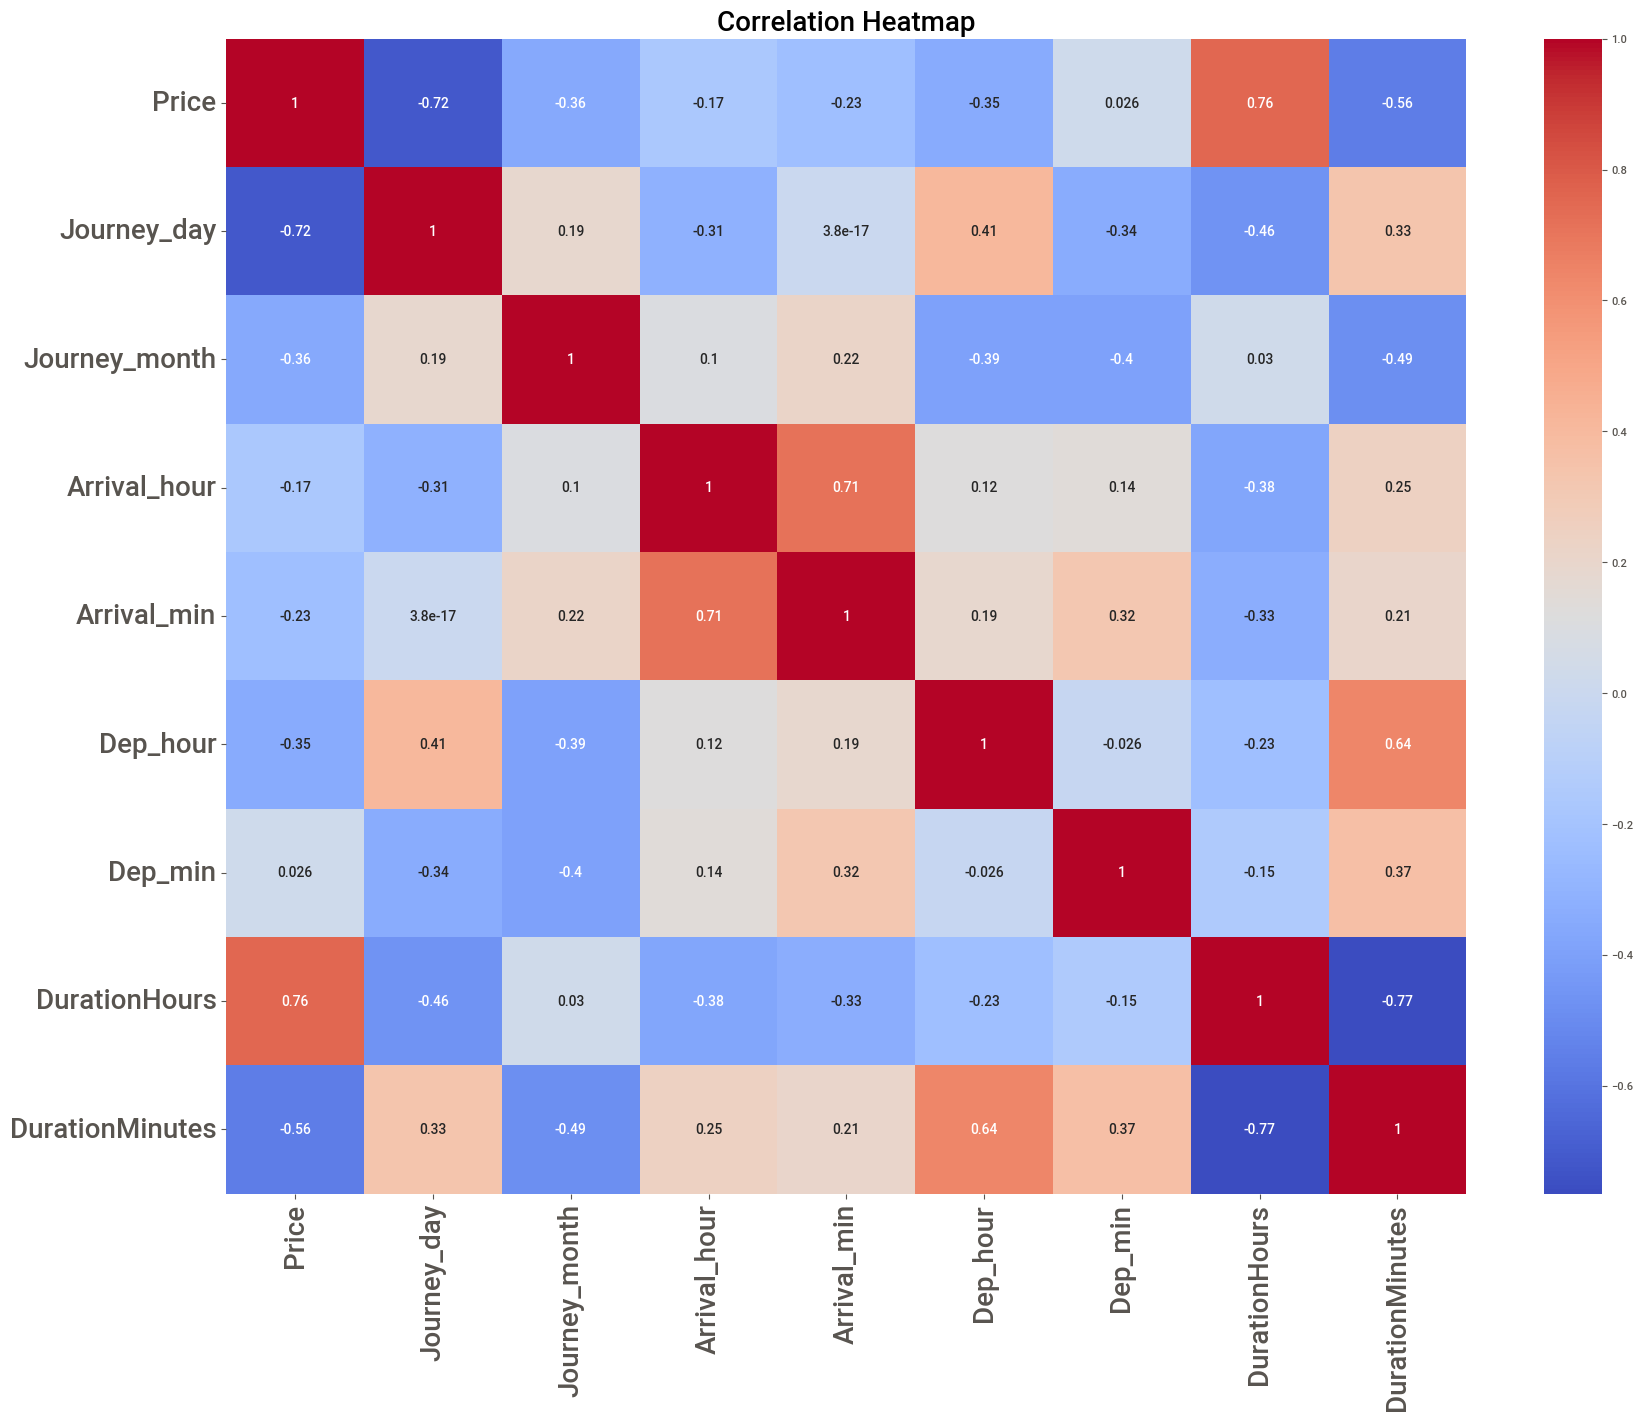

In [76]:
# Here, We are setting the size of the figure.
plt.figure(figsize=(20,15))

# Creating a heatmap of the correlation matrix of 'data2',
# "annot=True" adds the correlation values in each cell,
# "cmap" sets the color.
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")

# Add a title.
plt.title("Correlation Heatmap", fontsize=20)

# Adjusting the tick label size for better understanding.
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tick_params(labelsize=20)

# (9). Model Creation (Linear Regression) :

## (9.1) Split data into x and y

In [77]:
# Extracting features (independent variables) by dropping the "price" column. 
x = data2.drop("Price", axis=1)

# Extracting the target variable (dependent variable), which is "Price".
y = data2["Price"]

In [78]:
# 'x' represents the features (independent variables) of our dataset, 
# excluding the "Price" column.

x

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,22,25,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10679,27,4,23,20,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10680,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,1,3,14,10,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [79]:
# 'y' represents the target variable (dependent variable), 
# which is the "Price" column. 

y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

## (9.2) Split data for training and testing

- We will divide our data into training and testing.
- It works on (70:30) or (80:20) rule. It means 70% of the data will be used for training and 30% data will be used for testing.
- Whichever i.e, (70:30) or (80:20) will give best result. We will go with that result.
- In order to test the model, We take a data which is not seen by Model.

In [80]:
# Importing the necessary module for splitting the dataset.
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing set.
# x_train : Features for training.
# x_test : Features for testing.
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, It means if we run the code with the same random state, we will get the same split each time.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)

In [81]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print(x_train.shape)

# It will print the shape of the training target variable (y_train).
print(y_train.shape)

# It will print the shape of the testing feature set (x_test).
print(x_test.shape)

# it will print the shape of the testing target variable.
print(y_test.shape)

(7846, 32)
(7846,)
(2616, 32)
(2616,)


## (9.3). Model Building

In [82]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Initializing the model
lr = LinearRegression()

# Train model with 'x_train' and 'y_train'.
lr.fit(x_train,y_train)

LinearRegression()

## (9.4) Make Predictions / Test Model

In [83]:
# To make a prediction we use 'x_test'.

# Here, We are predicting the target variable for the testing set (x_test) 
# using the trained Linear Regression model. 
y_pred = lr.predict(x_test)

In [84]:
# It contains the predicted values of the target variable (Price) for the testing set.
y_pred

array([14634.17615708,  4278.66426681,  4446.49248034, ...,
       11381.99895587, 12730.40270212,  4105.02588504])

In [85]:
# It contains the actual values of the target variable(Price) for the testing set.
y_test

2150    17996
3784     3873
714      4462
7558     2228
7413     4991
        ...  
9533    10031
8141    13832
4895    14151
9550    14781
601      4174
Name: Price, Length: 2616, dtype: int64

In [86]:
# We have created a new DataFrame named as "actual value" which is used to store the actual values ('y_test') and 
# predicted values ('y_pred') side by side.
actual_value = y_test.copy()

# Here, We are adding a new column "pred" to "actual_value" which will store the predicted values generated by the model (y_pred).
actual_value["Pred"] = y_pred

# It consists of two column i.e, 'Price' (actual values) and 'pred' (predicted values).
actual_value

2150                                                17996
3784                                                 3873
714                                                  4462
7558                                                 2228
7413                                                 4991
                              ...                        
8141                                                13832
4895                                                14151
9550                                                14781
601                                                  4174
Pred    [14634.17615707566, 4278.664266813164, 4446.49...
Name: Price, Length: 2617, dtype: object

In [87]:
data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(data)

      Actual     Predicted
2150   17996  14634.176157
3784    3873   4278.664267
714     4462   4446.492480
7558    2228   6938.676250
7413    4991   2634.404862
...      ...           ...
9533   10031  11655.185168
8141   13832  10432.915435
4895   14151  11381.998956
9550   14781  12730.402702
601     4174   4105.025885

[2616 rows x 2 columns]


## (9.5) Evaluate the Model

- We use loss functions or error functions to know the difference between actual and predicted values.
- To evaluate the model we consider y_test and y_pred.

### (9.5.1) Different Error/Loss functions in Regression algorithm are:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [88]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (9.5.1.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [89]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.
MSE = mean_squared_error(y_test,y_pred)
MSE

8223510.065955069

#### (9.5.1.2) MAE (Mean Absolute Error) 
- It calculates the average absolute difference between the actual values and the predicted values.

In [90]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
MAE

1991.083300217114

#### (9.5.1.3) RMSE(Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [91]:
# Here, We are calculating the square root of Mean Squared Error.
RMSE = np.sqrt(MSE)
RMSE

2867.666310077773

### (9.5.2) R2 Score
- We use R2 Score in order to measure a model in terms of percentage.

In [92]:
# It will display the shape of 'y_test'.
y_test.shape

(2616,)

In [93]:
# We are calculating r2_score to eavluate the performanec of model.
lr_score = r2_score(y_test,y_pred)
lr_score

0.6148469109717775

### (9.5.3) Adjusted R2 Score 
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [94]:
# It will return the number of elements in 'y_test'.
len(y_test)

2616

In [95]:
# We are retrieving the number of features in x_test.
x_test.shape[1]

32

In [96]:
# Calculating an adjusted R-squared.
adj_r2 = 1-(1-lr_score)*(2616-1)/(2616-32-1)
adj_r2

0.6100753667019737

# (10) Model Creation [ KNN (K Nearest Neighbors) ] 

## (10.1) Split data into x and y
- For the model creation we have to seperate the independent(x) and dependent(y) variable.

In [97]:
# Extracting the features(independent variables) by dropping the 'Price' column. 
x = data2.drop("Price", axis=1)

# Extracting the target varible(dependent variable), which is 'Price'.  
y = data2["Price"]

In [98]:
# 'x' represent the features (independent variables) of our dataset. 
# excluding the 'Price' column.
x

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,22,25,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10679,27,4,23,20,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10680,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,1,3,14,10,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [99]:
# 'y' represents the target variable (dependent variable),
# which is the 'Price' column.
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

## (10.2) split data for training and testing

In [100]:
# Importing the necessary module for splitting the dataset.
from sklearn .model_selection import train_test_split

# splitting the dataset into training and testing set.
# x_train : Features for training.
# x_test : Features for testing.
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, 
# It means if we run the code with the same random state, we will get the same split each time.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [101]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print(x_train.shape)

# It will print the shape of the training target variable (y_train).
print(y_train.shape)

# It will print the shape of the testing feature set (x_test).
print(x_test.shape)

# it will print the shape of the testing target variable.
print(y_test.shape)

(7846, 32)
(7846,)
(2616, 32)
(2616,)


## (10.3) Model Building

In [102]:
# Using K-Nearest Neighbors (KNN) regression to predict target values for the x_test.
from sklearn.neighbors import KNeighborsRegressor

# Starting a KNN regressor with 5 neighbors
KNN = KNeighborsRegressor(n_neighbors=5)

# Training the model with the training data.
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [103]:
# Predicting the target vaue for the x_test and 
# storing the predicted values in the 'y_pred' variable. 
y_pred = KNN.predict(x_test)
y_pred

array([12131. ,  3853.8,  4560.4, ..., 13979.2, 10993. ,  3980.6])

In [104]:
# It will check each prediction against the actual values in the 'y_test' and
# counts how many times they are different.

(y_test != y_pred).sum()

2593

In [105]:
# It will tell us how many elements are present in the 'y_test'.

len(y_test)

2616

In [106]:
# It will calculate the percentage of predictions that were wrong in the 'y_test'. 

(y_test!=y_pred).sum()/len(y_test)

0.9912079510703364

In [107]:
# looping through different values of 'n_neighbors' to find the error rate for each KNN model.

# List to store the error rates for different values of 'n_neighbors'.
ERROR_RATE=[]

# Trying different 'n_neighbors' values from 1 to 12.
for i in range(1,15):
    
    # Creating a KNN regressor with the current 'n_neighbors' value.
    KNN = KNeighborsRegressor(n_neighbors=i)
    
    # Training the KNN model with the training data.
    KNN.fit(x_train,y_train)
    
    # Predicting target values from the 'x_test'.
    y_pred=KNN.predict(x_test)
    
    # Calculating the error rate for the current 'n_neighbors'.
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    
    # Appending the error rate to the list for further analysis.
    ERROR_RATE.append(error_rate)

In [108]:
# It is showing us the list of Error Rates.
ERROR_RATE

[0.7974006116207951,
 0.9224006116207951,
 0.9629204892966361,
 0.9801223241590215,
 0.9912079510703364,
 0.9935015290519877,
 0.9965596330275229,
 0.9973241590214067,
 0.9984709480122325,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

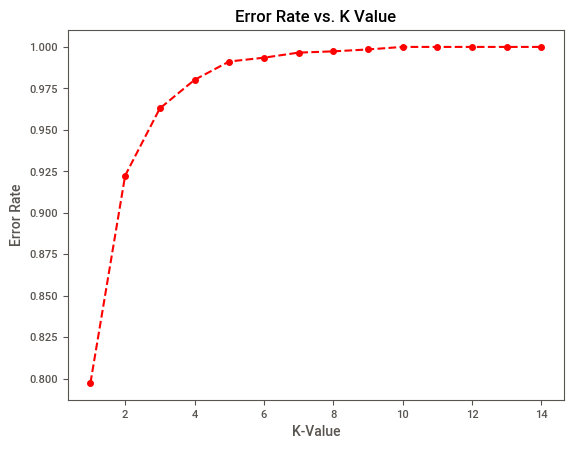

In [109]:
# Let's plot the 'k-value' and 'error rate'

# The x-axis values are in the range from 1 to 12.
# The y-axis values aare given by the varubale 'ERROR_RATE'.
# The line is styled iwth a red color, cirular marker ('o'),
# and a dashed line ('--').
plt.plot(range(1,15),
         ERROR_RATE,
         color='red',
         marker='o',
         markersize=4,
         linestyle='--')

# Adding a title to the plot.
plt.title('Error Rate vs. K Value')

# Here, We are labeling the x-axis with the text 'K'.
plt.xlabel('K-Value')

# We are lebeling the y-axis with the text 'Error Rate'.
plt.ylabel('Error Rate')

# Displaying the plot.
plt.show()

In [110]:
# It will import the 'KNeighborsRegressor' class from the scikit-learn library.
from sklearn.neighbors import KNeighborsRegressor

# Creating a 'KneighborsRegressor' model with 4 neighbors,
# It will consider 4 nearest neighbors when making predictions.
KNN=KNeighborsRegressor(n_neighbors=4)

# Training the KNN model with the training data (x_train, y_train).
# ".fit" method is used to train the KNN model with the training data.
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [111]:
# Predicting the target varibale (y_pred) using the trained KNN model on test data (x_test).
y_pred=KNN.predict(x_test)
y_pred

array([13248.25,  3849.  ,  4494.75, ..., 14151.  , 11030.25,  4015.5 ])

## (10.4) Evaluate the Model
- We use loss functions or error functions to know the difference between actual and predicted values.

### (10.4.1) Different Error/Loss functions in Regression algorithm are:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

**For Training the model we have used : x_train, y_train**

**For Prediction of the model we have used : x_test**

**For Evaluating the model we have used : y_test, y_pred**

In [112]:
# importing all necessary metrics for evaluating regression model perfromance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (10.4.1.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [113]:
# Here, 'y_test' indicates actualvalues and
# 'y_pred' indicates predicted values.

# Calculating the Mean Squared Error.

mse = mean_squared_error(y_test,y_pred)
mse

10132557.992306957

#### (10.4.1.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and predicted values.

In [114]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.

mae = mean_absolute_error(y_test,y_pred)
mae

2000.7706422018348

#### (10.4.1.3) RMSE (Root Mean Squared Error)
- It's the square root of the MSE (Mean Squared Error).

In [115]:
# Here, We are calculating teh square root of Mean Squared Error. 
RMSE = np.sqrt(MSE)
RMSE

2867.666310077773

### (10.4.2) r2_score
- We use R2 Score in order to measure a model in terms of percentage.

In [116]:
# It will display the shape of 'y_test'.

y_test.shape

(2616,)

In [117]:
# We are calculating 'r2_score' to evaluate the performance of the model. 
knn_score=r2_score(y_test,y_pred)
knn_score

0.5254354917553825

### (10.4.3) adjusted r2_score
- It is a modified version of R2 Score which handles confusion better, when there are manyfactors.

In [118]:
# It will return the number of elements in 'y_test'.

len(y_test)

2616

In [119]:
# We are retrieving the number of features in 'x_test'. 

x_test.shape[1]

32

In [120]:
# Calculating the adjusted R-squared.

adj_r2=1-(1-knn_score)*(2616-1)/(2616-32-1)
adj_r2

0.5195562566551782

# (11) Model Creation (Decision Tree) 

## (11.1) Split data into x and y

In [121]:
# Extracting features (independent variables) by dropping the "price" column. 
x = data2.drop('Price', axis=1)

# Extracting the target variable (dependent variable), which is "Price".
y = data2["Price"]

In [122]:
# 'x' represents the features (independent variables) of our dataset, 
# excluding the "Price" column.

x

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,22,25,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10679,27,4,23,20,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10680,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,1,3,14,10,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [123]:
# 'y' represents the target variable (dependent variable), 
# which is the "Price" column. 

y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

## (11.2) Split data for training and testing

In [124]:
# Importing the necessary module for splitting the dataset
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing set.

# x_train : Features for training.
# x_test : Features for testing.b
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, It means if we run the code with the same random state, 
# we will get the same split each time.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [125]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print(x_train.shape)

# It will print the shape of the training target variable (y_train).
print(y_train.shape)

# It will print the shape of the testing feature set (x_test).
print(x_test.shape)

# it will print the shape of the testing target variable.
print(y_test.shape)

(7846, 32)
(7846,)
(2616, 32)
(2616,)


## (11.3) Model Building

In [126]:
# importing decision tree from sklearn.tree.
from sklearn.tree import DecisionTreeRegressor

# Initializing a Decision Tree Regressor model.
dt = DecisionTreeRegressor()

# Training the Decision Tree model with training data (features: 'x_train', target: 'y_train').
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [127]:
# Making predictions on the test data (x_test) using the trained model.
y_pred = dt.predict(x_test)
y_pred

array([14368.5,  3841. ,  4148. , ..., 14151. , 10844. ,  3841. ])

## (11.4) Evaluate the Model
- We use loss functions or error functions to know the difference between actual and predicted values.

### (11.4.1) Different Error/Loss functions in Regression algorithm are:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [128]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (11.4.1.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [129]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.
mse = mean_squared_error(y_test, y_pred)
mse

6474898.789649167

#### (11.4.1.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and the predicted values.

In [130]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
mae = mean_absolute_error(y_test, y_pred)
mae

1426.3911824668705

#### (11.4.1.3) RMSE(Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [131]:
# Here, We are calculating the square root of Mean Squared Error.
RMSE = np.sqrt(MSE)
RMSE

2867.666310077773

### (11.4.2) r2_score
- We use R2 Score in order to measure a model in terms of percentage.

In [132]:
# It will display the shape of 'y_test'.
y_test.shape

(2616,)

In [133]:
# We are calculating r2_score to eavluate the performanec of model.
dt_score = r2_score(y_test, y_pred)
dt_score

0.6967441822315268

### (11.4.3) adjusted r2_score
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [134]:
# It will return the number of elements in 'y_test'.
len(y_test)

2616

In [135]:
# We are retrieving the number of features in 'x_test'.
x_test.shape[1]

32

In [136]:
# Calculating the adjusted R-squared.

adj_r2 = 1-(1-dt_score)*(2616)/(2616-32-1)
adj_r2

0.6928698338047519

# (12) Model Creation (RANDOM FOREST)

## (12.1) Split data into x and y

In [137]:
# For the model creation we have to seperate the independent and dependent.

# Extracting features (independent variables) by dropping the "price" column. 
x = data2.drop("Price", axis=1)

# Extracting the target variable (dependent variable), which is "Price".
y = data2["Price"]

In [138]:
# 'x' represents the features (independent variables) of our dataset, 
# excluding the "Price" column.

x

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,22,25,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10679,27,4,23,20,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10680,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,1,3,14,10,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [139]:
# 'y' represents the target variable (dependent variable), 
# which is the "Price" column. 

y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

## (12.2) Split data for training and testing

In [140]:
# Importing the necessary module for splitting the dataset.
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing set.

# x_train : Features for training.
# x_test : Features for testing.
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, It means if we run the code with the same random state, we will get the same split each time.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [141]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print(x_train.shape)

# It will print the shape of the training target variable (y_train).
print(y_train.shape)

# It will print the shape of the testing feature set (x_test).
print(x_test.shape)

# it will print the shape of the testing target variable.
print(y_test.shape)

(7846, 32)
(7846,)
(2616, 32)
(2616,)


## (12.3) Model Building

In [142]:
# Importing RandomForestRegressor from "sklearn.ensemble"
from sklearn.ensemble import RandomForestRegressor

# Initializing a RandomForestRegressor model.
RFR = RandomForestRegressor()

# Training the Random Forest model with training data (features: 'x_train', target: 'y_train').
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [143]:
# Making predictions on the test data (x_test) using the trained model.
y_pred = RFR.predict(x_test)
y_pred

array([15307.681     ,  3844.52      ,  4257.475     , ...,
       13647.93833333, 11731.163     ,  4009.38      ])

## (12.4) Evaluate the Model
- We use loss functions or error functions to know the difference between actual and predicted values.

### (12.4.1) Different Error/Loss functions in Regression algorithm are:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [144]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (12.4.1.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [145]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.
MSE = mean_squared_error(y_test, y_pred)
MSE

3852581.6095460765

#### (12.4.1.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and the predicted values.

In [146]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
MAE = mean_absolute_error(y_test, y_pred)
MAE

1191.6774139846202

#### (12.4.1.3) RMSE (Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [147]:
# Here, We are calculating the square root of Mean Squared Error.

RMSE = np.sqrt(MSE)
RMSE

1962.799431818258

### (12.4.2) r2_score
- We use R2 Score in order to measure a model in terms of percentage.

In [148]:
# It will display the shape of 'y_test'.

y_test.shape

(2616,)

In [149]:
# We are calculating r2_score to eavluate the performanec of model.

RF_Score = r2_score(y_test, y_pred)
RF_Score

0.8195620001983104

### (12.4.3) adjusted r2_score
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [150]:
# It will return the number of elements in 'y_test'.

len(y_test)

2616

In [151]:
# We are retrieving the number of features in 'x_test'.

x_test.shape[1]

32

In [152]:
adj_r2 = 1-(1-RF_Score)*(2616-1)/(2616-32-1)
adj_r2

0.8173266087954245

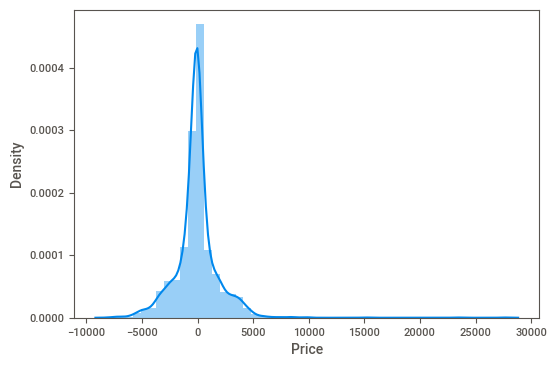

In [153]:
# Here, We are setting the figure size to 6 inches in width and 4 inches in height.
plt.figure(figsize=(6,4))

# It will create a distribution plot (histogram) of 
# the differences between y_test (actual values) and y_pred (predicted values).

sns.distplot(y_test-y_pred)

# It will display the plot.
plt.show()

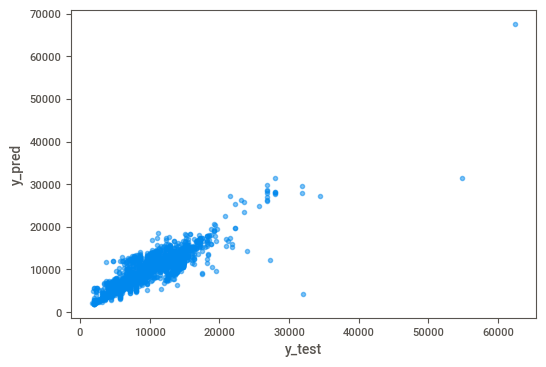

In [154]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(6,4))

# Creating a scatter plot comparing  the actual values (y_test) 
# with the predicted values (y_pred).
# The 'aplha' parameter conrols the transparency of the poitns (0.5 means semi-transparent).
plt.scatter(y_test, y_pred, alpha = 0.5)

# Adding label to the x-axis.
plt.xlabel("y_test")

# Adding label to the y-axis.
plt.ylabel("y_pred")

# Displaying the plot.
plt.show()

## (12.5) HYPER PARAMETER TUNING (RANDOM FOREST)

In [155]:
# Importing the RandomizedSearchCV class from scikit-learn's model_selection module.

from sklearn.model_selection import RandomizedSearchCV

#### (12.5.1) Defining the parameter grid for RandomizedSearchCV
- We are using list comprehensions to generate values for each hyperparameter. 

In [156]:
# Number of trees in the random forest. 
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in the tree.
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

# Minimum number of samples required to split an internal node.
min_samples_split = [2,3,10,15,20]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1,2,4,8,10]

In [157]:
# Creating a dictionary (random_grid) with hyperparameter named as "keys" 
# and corresponding lists of values as "values".

# 'n_estimators', 'max_features', 'max_depth', 'min_samples_split' and 'min_samples_leaf'. 
# These all are hyperparameter keys and values.
random_grid = { 'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

In [158]:
# Creating a RandomizedSearchCV instance(example).
rf_random = RandomizedSearchCV(
    
    # 'estimator' is the machine learning model, 
    # This is the model for which the hyperparameters will be optimized. 
    estimator = RFR,
    
    # 'param_distribution' is set to the dictionary 'random_grid',
    # which contains the hyperparameter names and their corresponding ranges.
    # This defines the seach space for the randomized search.
    param_distributions = random_grid,
    
    # 'scoring' is evaluation metric which is used to find the best combination of hyperparameters.
    scoring = 'neg_mean_squared_error',
    
    # Trying 200 different combinations of hyperparameters.
    n_iter = 100,  
    
    # 'cv' is number of cross-validation folds used during randomized search, it is set to 4.
    cv = 4,  
    
    # It provides more detailed output during the search.
    verbose = 2,  
    
    # Using random_state (76) to make sure our results can be recreated exactly.
    random_state = 42,
    
    # It utilizes all available processors for parallelprocessing during the search.
    n_jobs = -1  
)

In [159]:
# x_train : The features matrix of the training data.
# y_train : The target values of the training data.

# We use '.fit' method to perform the hyperparameter search and 
# find the best parameters for our model.
rf_random.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 3, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [160]:
# Accessing(showing) the best hyperparameters found during the search.

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70}

In [161]:
# Importing RandomForestRegressor from the 'sklearn.ensemble'.
from sklearn.ensemble import RandomForestRegressor

# Creating a RandomForestRegressor instance with specific hyperparameter values.
RFR = RandomForestRegressor(
  
  # Number of trees in the random forest.
  n_estimators=300,
    
  # Minimum number of samples required to split an internal node.
  min_samples_split = 8,
  
  # Minimum number of samples required at each leaf node.  
  min_samples_leaf = 1,
  
  # Number of features to consider at every split.
  max_features = 'sqrt',
  
  # Maximum number of levels in the tree. 
  max_depth = 15 )

# Fitting the RandomForestRegressor to the training data.
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=8,
                      n_estimators=300)

In [162]:
# Making predictions on the test data (x_test).
y_pred = RFR.predict(x_test)
y_pred

array([14776.08040402,  3889.12171049,  4475.82625689, ...,
       12417.32523228, 11721.54471655,  4057.54349693])

### (12.5.2) Different Error/Loss functions in Regression algorithm are :
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [163]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (12.5.2.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [164]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.
MSE = mean_squared_error(y_test, y_pred)
MSE

4112992.387368465

#### (12.5.2.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and the predicted values.

In [165]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
MAE = mean_absolute_error(y_test, y_pred)
MAE

1330.0998585277653

#### (12.5.2.3) RMSE (Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [166]:
# Here, We are calculating the square root of Mean Squared Error.

RMSE = np.sqrt(MSE)
RMSE

2028.051376905542

In [167]:
# Training score of random forest.

RFR.score(x_train,y_train)

0.8714884225023594

In [168]:
# Testing score of the random forest.

RFR.score(x_test,y_test)

0.807365503241401

### (12.5.3) R2_score
- We use R2 Score in order to measure a model in terms of percentage.

In [169]:
# It will display the shape of 'y_test'.
y_test.shape

(2616,)

In [170]:
# We are calculating r2_score to eavluate the performanec of model.

RF_score = r2_score(y_test,y_pred)
RF_score

0.807365503241401

### (12.5.4) Adjusted r2 score
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [171]:
# It will return the number of elements in 'y_test'.

len(y_test)

2616

In [172]:
# We are retrieving the number of features in 'x_test'.
x_test.shape[1]

32

In [173]:
adj_r2 = 1-(1-RF_score)*(2616-1)/(2616-32-1)
adj_r2

0.8049790131537993

### (12.5.5) Predictions on the test set (x_test)

In [174]:
# Make predictions on the test set (x_test) using the model found 
# during the hyperparameter search.
 
prediction = rf_random.predict(x_test)

### (12.5.6) Plotting the distribution

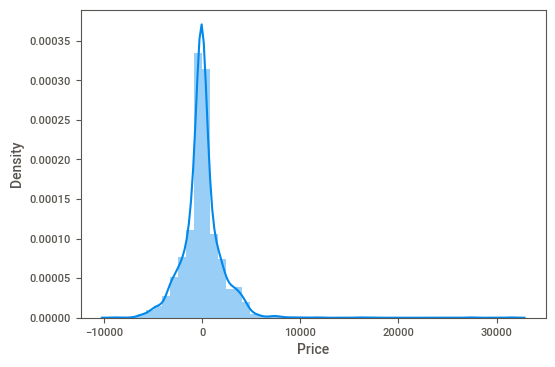

In [175]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(6,4))

# plotting the distribution of the residuals (difference between true and predicted values).
sns.distplot(y_test-prediction)

# Displaying the plot.
plt.show()

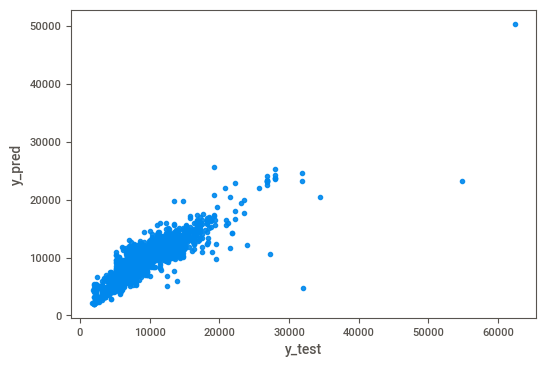

In [176]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(6,4))

# Scatter plot of true values (y_test) vs predicted values (y_pred).
plt.scatter(y_test, y_pred, alpha=0.9)

# Adding labels for x and y axes.
plt.xlabel("y_test")
plt.ylabel("y_pred")

# Displaying the plot.
plt.show()

# (13) GRADIENT BOOSTING

## (13.1) Split data into x and y

In [177]:
# Extracting features (independent variables) by dropping the "price" column. 
x = data2.drop("Price", axis=1)

# Extracting the target variable (dependent variable), which is "Price".
y = data2["Price"]

In [178]:
# 'x' represents the features (independent variables) of our dataset, 
# excluding the "Price" column.

x

,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,DurationHours,DurationMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,5,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,9,6,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,12,5,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,3,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,22,25,19,55,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10679,27,4,23,20,20,45,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10680,27,4,11,20,8,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10681,1,3,14,10,11,30,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [179]:
# 'y' represents the target variable (dependent variable), 
# which is the "Price" column. 

y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

## (13.2) Split data for training and testing

In [180]:
# Importing the necessary module for splitting the dataset
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing set.

# x_train : Features for training.
# x_test : Features for testing.b
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, It means if we run the code with the same random state, 
# we will get the same split each time.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [181]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print(x_train.shape)

# It will print the shape of the training target variable (y_train).
print(y_train.shape)

# It will print the shape of the testing feature set (x_test).
print(x_test.shape)

# it will print the shape of the testing target variable.
print(y_test.shape)

(7846, 32)
(7846,)
(2616, 32)
(2616,)


## (13.3) Model Building

In [182]:
# Importing GradientBoostingRegressor from 'sklearn.ensemble'.
from sklearn.ensemble import GradientBoostingRegressor

# Initializing a GradientBoostingRegressor model.
gb = GradientBoostingRegressor(n_estimators=200)

# Traing the Gradient Boosting model with training data.
gb.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [183]:
# Making predictions on the test data (x_test) using the trained model.
y_pred = gb.predict(x_test) 
y_pred

array([14793.94450854,  3916.7222059 ,  4903.78285431, ...,
       12021.6917126 , 12204.62000639,  3738.61542957])

## (13.4) Evaluate the Model
- We use loss functions or error functions to know the difference between actual and predicted values.

### (13.4.1) Different Error/Loss functions in Regression algorithm are :
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [184]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (13.4.1.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [185]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.
mse = mean_squared_error(y_test, y_pred)
mse

4519352.529148359

#### (13.4.1.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and the predicted values.

In [186]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
mae = mean_absolute_error(y_test, y_pred)
mae

1466.6224783806406

#### (13.4.1.3) RMSE (Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [187]:
# Here, We are calculating the square root of Mean Squared Error.

RMSE = np.sqrt(MSE)
RMSE

2028.051376905542

### (13.4.2) r2_score
- We use R2 Score in order to measure a model in terms of percentage.

In [188]:
# It will display the shape of 'y_test'.
y_test.shape

(2616,)

In [189]:
# We are calculating r2_score to eavluate the performanec of model.

gb_score = r2_score(y_test, y_pred)
gb_score

0.7883333791716051

### (13.4.3) adjusted r2_score
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [190]:
# It will return the number of elements in 'y_test'.

len(y_test)

2616

In [191]:
# We are retrieving the number of features in 'x_test'.

x_test.shape[1]

32

In [192]:
# Calculating the adjusted R-squared.

adj_r2 = 1-(1-gb_score)*(2616-1)/(2616-32-1)
adj_r2

0.7857111058976954

## (13.5) HYPER PARAMETER TUNING (GRADIENT BOOSTING)

### (13.5.1) Defining the parameter grid for RandomizedSearchCV.

In [193]:
# RandomizedSearchCV helps to find the best combination of these hyperparameters for a model.

# Importing the RandomizedSearchCV class from sikit-learn's model_selection module.
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid for the RandomizedSeacrhCV.
param_grid = {
    
    # Number of trees in the forest.
    'n_estimators' : [100, 200, 500,1000],
    
    # Controls the step size during training and helps to prevent overfitting.
    'learning_rate' : [0.01, 0.1, 0.5, 1.0],
    
    # Maximum depth of the trees.
    'max_depth' : [3,5,9,11],
    
    # Minimum samples needed to split a group of data during tree building.
    'min_samples_split' : [2,4,8,10],
    
    # Minimum samples required at leaf node.
    'min_samples_leaf' : [1,2,4,8],
    
    # Fraction of data used for training each tree.
    'subsample' : [0.8, 0.9, 1.0,2.0]
}

In [194]:
# It will create an instance of the 'GradientBoostingRegressor'.

gradient_boosting = GradientBoostingRegressor()

In [195]:
# Creating a RandomizedSearchCV instance.
rsc = RandomizedSearchCV(
    
    # # 'estimator' is the machine learning model, 
    # This is the model for which the hyperparameters will be optimized. 
    estimator=gradient_boosting,
    
    # 'param_distribution' is set to the dictionary 'random_grid',
    # which contains the hyperparameter names and their corresponding ranges.
    # This defines the seach space for the randomized search.
    param_distributions=param_grid,
    
    # 'scoring' is evaluation metric which is used to find the 
    # best combination of hyperparameters. 
    # Here, We have used evaluation metric as negative mean squared error. 
    scoring='neg_mean_squared_error',  
    
    # Trying 100 different combinations of hyperparameters.
    n_iter=100,  
    
    # 'cv' is number of cross-validation folds used during randomized search, it is set to 4.
    cv=4,
    
    # It provides more detailed output during the search.
    verbose=2,
    
    # Using random_state (42) to make sure our results can be recreated exactly.
    random_state = 42,
    
    # It utilizes all available processors for parallel processing during the search
    n_jobs=-1,
)

In [196]:
# It trains the model using the training data ('x_train', 'y_train') 
# by exploring different hyperparameters combinations through the RandomizedSearchCV.

# The goal is to find the set of hyperparameters that results in the best model performance.
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [3, 5, 9, 11],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0, 2.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [197]:
# Accessing(showing) the best hyperparameters found during the search.

rsc.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'learning_rate': 0.1}

In [198]:
# Importing GradientBoostingRegressor from the 'sklearn.ensemble'.
from sklearn.ensemble import GradientBoostingRegressor

# Creating a GradientBoostingRegressor instance with specific hyperparameter values.
gradient_boost = GradientBoostingRegressor( 
                                            # Fraction of data used for training each tree.
                                            # A value of 0.9 means each tree is trained on 90% data.
                                            subsample = 0.9,
    
                                            # Number of trees in the random forest.
                                            n_estimators = 500,
    
                                            # Minimum number of samples required to split an internal node.
                                            min_samples_split = 10,
                                            
                                            # Minimum number of samples required at each leaf node.  
                                            min_samples_leaf = 4,
                                           
                                            # Adjustments to the learning rate can impact how quickly and effectively the model learns patterns in the data
                                            learning_rate = 0.01,
                
                                            
                                            # Controlling the tree's depth to 5 helps the model learn complex patterns without going too deep.
                                            max_depth = 9 )

# Training the Gradient Boosting model on the training data ('x_train', 'y_train').
gradient_boost.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=9, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=500,
                          subsample=0.9)

In [199]:
# Making predictions on the test data (x_test) using the trained model
y_pred = gradient_boost.predict(x_test)
y_pred

array([14556.79733993,  3909.75589455,  4501.37859248, ...,
       12532.15236824, 12022.73654929,  4108.62768373])

### (13.5.2) Different Error/Loss functions in Regression algorithm are : 
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [200]:
# importing all the necessary metrics for evaluating regression model performance.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### (13.5.2.1) MSE (Mean Squared Error)
- It calculates the squared difference between actual and predicted values.

In [201]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Squared Error.

mse = mean_squared_error(y_test, y_pred)
mse

3271052.3983290605

#### (13.5.2.2) MAE (Mean Absolute Error)
- It calculates the average absolute difference between the actual values and the predicted values.

In [202]:
# Here, 'y_test' indicates actual values and 
# 'y_pred' indicates predicted values. 

# Calculating the Mean Absolute Error.
mae = mean_absolute_error(y_test, y_pred)
mae

1157.707114760068

#### (13.5.2.3) RMSE (Root Mean Squared Error)
- It's the square root of the MSE(Mean Squared Error).

In [203]:
# Here, We are calculating the square root of Mean Squared Error.

RMSE = np.sqrt(MSE)
RMSE

2028.051376905542

### (13.5.3) R2 Score
- We use R2 Score in order to measure a model in terms of percentage.

In [204]:
# It will display the shape of 'y_test'.
y_test.shape

(2616,)

In [205]:
# We are calculating r2_score to eavluate the performanec of model.

gb_score = r2_score(y_test, y_pred)
gb_score

0.8467982740356389

### (13.5.4) Adjusted R2 Score
- It is a modified version of R2 Score which handles confusion better, when there are many factors.

In [206]:
# It will return the number of elements in 'y_test'.

len(y_test)

2616

In [207]:
# We are retrieving the number of features in 'x_test'.

x_test.shape[1]

32

In [208]:
# Calculating the adjusted r2 score.

adj_r2 = 1-(1-gb_score)*(2616-1)/(2616-32-1)
adj_r2

0.844900304530854

# (14) RESULT

## (14.1) Comparison of the Best Models Evaluated by Cross Validation
* LinearRegressor - CV: 0.61
* KNeighborsRegressor - CV: 0.52
* DecisionTreeRegressor - CV: 0.70
* RandomForestRegressor - CV: 0.80
* GradientBoostingRegressor - CV: 0.84

In [209]:
# Creating a list of R2 scores for different algorithms
scores = [lr_score, knn_score, dt_score, RF_score, gb_score]

# List of algorithm names.
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]
              
# Loopin through each algorithm and printing its R2 score.
for i in range(len(algorithms)):
              
              print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The R2 score achieved using Linear Regression is: 0.6148469109717775%
The R2 score achieved using KNN is: 0.5254354917553825%
The R2 score achieved using Decision Tree is: 0.6967441822315268%
The R2 score achieved using Random Forest is: 0.807365503241401%
The R2 score achieved using Gradient Boosting is: 0.8467982740356389%


## (14.2) Creating a bar plot to visulaize R2 scores for different algorithms

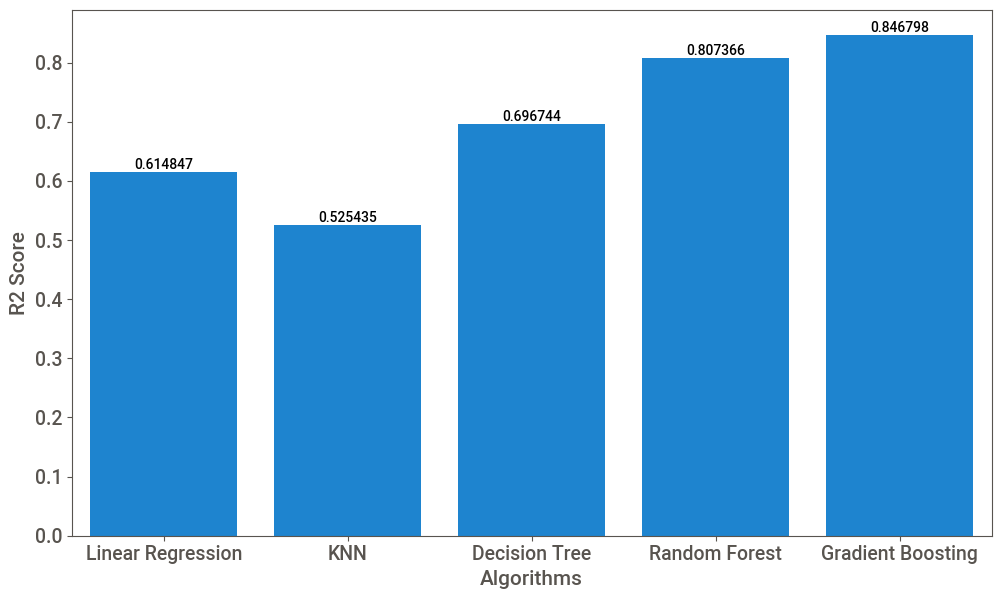

In [210]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(10,6))

# Adding labels to the axes.
plt.xlabel("Algorithms", fontsize=15)
plt.ylabel("R2 Score", fontsize=15)

# Using seaborn to create a bar  plot.
ax = sns.barplot(x = algorithms, y = scores)

# Adding labels to each bar in the plot. 
for label in ax.containers:
    ax.bar_label(label)

# Ensuring tight layout for a clean presentation.
plt.tight_layout()

# Adjusting tick label font size for better readability.
plt.tick_params(labelsize=14)

# (15). CONCLUSION
- In conclusion, using machine learing to predict flight prices has been really helpful for both travelers and airlines. The analysis found some important things that proves how helpful this way of predicting flight prices is :

## (15.1) Model Performance:
- The Gradient Boosting model is the best, with a high accuracy of 0.84. This means it's really good at predicting flight prices and telling us about pricing trends. 

## (15.2) Alternative Model: 
- The Random Forest model is also good at predicting flight prices, although a bit less accurate at 0.80 compared to Gradient Boosting. Having different good models allows us to pick the best way to predict flight prices.

## (15.3) Influential Features:
- The number of stops, how long the flight is, the airline, and the route are really important in deciding how much a flight costs. If we undestand these things, travelers can make better choices, and airlines can set prices smartly.

## (15.4) Summary of all the conclusions :
- In summary, uisng machine learning to predict flight prices is a powerful tool for airlines to set better prices. As technology gets better and we have more data, these tools will become more accurate and helpful for both airlines and travelers.

# (16). CHALLENGES FACED

## (16.1) Converting Date and Time:
-  Dealing  with unusual date and time formats is a big challenge. Making this data readable for machines involves careful preparation. Getting useful details, like the day of the week or time of day, requires careful sorting and adjusting the data.

## (16.2) Feature Correlation:
- Handling many features can be tricky, especially when trying to find important connections. Using tools like correlation matrices and scatter plot helps with this analysis. But when there are a lot of columns, it becomes complicated and takes a long time.

## (16.3) Hyperparameter Tuning:
- Adjusting hyperparameter is important but takes a lot of time. It means trying out the model with different setups several times. Trying out all the possibilities can take a lot of computer power.To do it more efficiently, we use strategies like gird search or random search.